<a href="https://colab.research.google.com/github/hap6v6/ML_study/blob/main/%EC%B6%94%EC%B2%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C%20%EC%9E%85%EB%AC%B8%ED%8E%B8/4_very_simple_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아주 간단한 추천 시스템 만들기

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_pickle('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/ratings_updated.p')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
9,1001,110102,3.0,2023-05-12 15:00:00
10,1001,177765,4.0,2023-05-13 15:00:00
11,1001,122916,4.5,2023-05-14 15:00:00
12,1001,166643,5.0,2023-05-15 15:00:00


# RMSE
간단한 예시 들어 설명

In [3]:
rating_example = [[4, 3.5], [5.0, 5.0], [0.5, 1], [3,5]]
rating_example = pd.DataFrame(rating_example, columns=['Actual', 'Predict'])

In [4]:
rating_example

,Actual,Predict
0,4.0,3.5
1,5.0,5.0
2,0.5,1.0
3,3.0,5.0


In [5]:
# 모델이 얼마나 잘 예측하고 있는지: 실제 값과 예측 값의 차이 구함 (error = Actual -Predict)
# error column에 저장
rating_example['error'] = rating_example['Actual'] - rating_example['Predict']

In [6]:
# squared error: +와 -가 캔슬되는 것을 막기 위해서
rating_example['squared error'] = rating_example['error'] ** 2
rating_example

,Actual,Predict,error,squared error
0,4.0,3.5,0.5,0.25
1,5.0,5.0,0.0,0.00
2,0.5,1.0,-0.5,0.25
3,3.0,5.0,-2.0,4.00


In [7]:
# mean squared error
mse = rating_example['squared error'].mean()
mse
# 현재 제곱된 상태

1.125

In [8]:
import numpy as np

In [9]:
# root mean squared error: rmse
rmse = np.sqrt(mse)
rmse
# 평균적으로 1점 정도 틀린다

1.0606601717798212

# RMSE with sklearn
예측 오차 값 쉽게 구하는 방법<br/><br/>
참고자료<br/>
https://scikit-learn.org/stable/<br/>
[[Coursera] Python을 통한 머신러닝: Evaluation Metrics in Regression Models](https://www.coursera.org/lecture/machine-learning-with-python/evaluation-metrics-in-regression-models-5SxtZ)

In [10]:
# 패키지가 커서 필요한 특정 모듈만 임포트 함
from sklearn.metrics import mean_squared_error

In [11]:
# sklearn 패키지의 mean_squared_error 함수 사용하면 바로 mse 값 구할 수 있음
mse = mean_squared_error(rating_example['Actual'], rating_example['Predict'])
rmse = np.sqrt(mse)
rmse

1.0606601717798212

# Train Test Split
- training set과 test set을 분리함<br/>
- overfitting 방지

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 데이터가 몰리지 않도록 랜덤하게 섞어서 분리한다
# 실행 시마다 랜덤하면 이 결과를 재현할 수 없을 것-> random_state 지정하여 해결
# test_size = 0.1 -> 전체의 10%를 테스트 셋으로 사용
train, test = train_test_split(ratings, random_state = 42, test_size=0.1)

In [14]:
# 겹치는 값 없이 분리
print(train.shape)
print(test.shape)

(90765, 4)
(10085, 4)


# 가장 간단한 예측하기

## 모두 0.5점으로 예측하기

In [15]:
predictions = [0.5] * len(test)

In [16]:
# mean_squared_error(actual, predict)
# 테스트 셋 사용
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse
# 평균적으로 3점 정도 틀린다
# train 데이터 분포 보면 평점 3.5점이 많은데, 모두 0.5점으로 예측하니 당연히 성능이 안 좋게 됨

3.1766219667257203

## (숙제) 모두 5점으로 예측하기

In [17]:
predictions_5 = [5.0] * len(test)

In [18]:
mse = mean_squared_error(test['rating'], predictions_5)
rmse = np.sqrt(mse)
rmse
# 평균적으로 2점 정도 틀린다
# 모두 0.5점으로 예측한 경우보다는 rmse가 좋다(작다)

1.834399713901505

## (숙제) 데이터의 평균으로 예측하기
- 주의점: train 데이터의 평균으로 test 데이터의 평균을 예측해야 함
- 평균을 구하는 건 train 데이터 사용하고, 예측은 test 데이터로 해야 함

In [19]:
# 평균 구하기
rating_mean = train['rating'].mean()
rating_mean

3.502071282983529

In [20]:
# 예측 값 (array)
prediction_mean = [rating_mean] * len(test)

In [21]:
mse = mean_squared_error(test['rating'], prediction_mean)
rmse = np.sqrt(mse)
rmse
# 평균적으로 1점 정도 틀린다

1.0521435077688452

## (숙제) 사용자 평점 기반 예측하기
- 각 사용자의 평균 평점으로(train), 영화에 대한 평점을 예측(test)하세요.
- train에 해당 사용자에 대한 평점기록이 전혀 없다면, 어떻게 해야할까요?
- (예: userId 1번의 train 데이터상 평균 평점을 4.33이라고 한다면, userId 1번의 test 데이터에 대한 모든 영화 평점을 4.33으로 한다.)
- 이 예측 방법은 어떤 가정을 가지고 있나요? 예측의 근거를 찾아보세요.

In [22]:
# 주의: train이나 test 데이터에 아예 사용자에 대한 평점기록이 전혀 없는 경우는 흔지 않음

In [43]:
# 각 사용자의 평균 평점 구하기 (groupby: userId 기준으로 rating이 평균 구하기)
# reset_index(): 단순한 인덱스 리셋. 정수 인덱스 달기
user_mean = train.groupby('userId')['rating'].mean().reset_index()
# rename(): 레이블 명 바꾸기
user_mean = user_mean.rename(columns = {'rating':'predict'})
user_mean

,userId,predict
0,1,4.333333
1,2,3.925926
2,3,2.529412
3,4,3.512690
4,5,3.627907
...,...,...
607,608,3.145695
608,609,3.242424
609,610,3.696413
610,1000,3.928571


In [44]:
# <내가 작성한 코드>: user_mean 리스트를 test 테이블에 새 column으로 작성함
# test['userMean'] = test['userId'].apply(lambda x: user_mean[x])

# <해설 코드>: user_mean 테이블과 test 테이블을 머지하여 새 테이블에 저장.
# merge(): 두 테이블을 붙인다
# how 옵션: 기준 테이블 지정 ('left': test 테이블)
# test 테이블에 있는 userId가 user_mean 테이블에는 없을 수도 있음. 그런 경우에도 userId가 제외되지 않도록 test 테이블 기준으로.
# on 옵션: 붙일 때 기준이 되는 column
predict_by_users = test.merge(user_mean, how='left', on='userId')

In [45]:
# train에 해당 사용자에 대한 평점 기록이 없는 갯수 확인
# .isnull().sum(): null 값 여부 column별 합산.
predict_by_users.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
predict      0
dtype: int64

In [66]:
# 모델 성능 평가
# <내가 작성한 코드> mse = mean_squared_error(test['rating'], test['userMean'])

mse = mean_squared_error(predict_by_users['rating'], predict_by_users['predict'])
rmse = np.sqrt(mse)
rmse
# 전체 데이터의 평균으로 예측하는 것보다는 각 사용자의 평균평점으로 예측하는 것이 조금 더 성능이 좋다

0.9478166244865593

### 예측의 근거
원래는 예측의 근거를 찾아서-> 이런 방법이 예측의 성능을 높일 수 있겠구나 인지한 후-> 예측 실행 (현 흐름과 반대)

In [47]:
# 전체 rating의 표준편차
train['rating'].std()
# 데이터가 평균에서 1점 정도 떨어져 있다

1.0414914329061367

In [48]:
# 각 사용자 별 rating 표준편차
train.groupby('userId')['rating'].std()
# 3번 사용자는 표준편차가 크다 - 평점을 다양하게 주네
# 610번 사용자 표준편차 작다 (평균과 차이 적다) - 같은 평점을 자주 주네
# => 각 사용자마다의 특성을 알 수 있다. 전체 평균보다는 사용의 평균으로 예측하는 것이 성능을 높일 수 있다.

userId
1       0.812523
2       0.805076
3       2.131798
4       1.342436
5       1.000554
          ...   
608     1.082764
609     0.435194
610     0.854263
1000    0.975900
1001    1.722401
Name: rating, Length: 612, dtype: float64

In [49]:
# 전체 사용자 별 rating 표준편차의 평균
train.groupby('userId')['rating'].std().mean()
# 전체 rating의 표준편차보다 작다

0.9269537766382632

<Axes: >

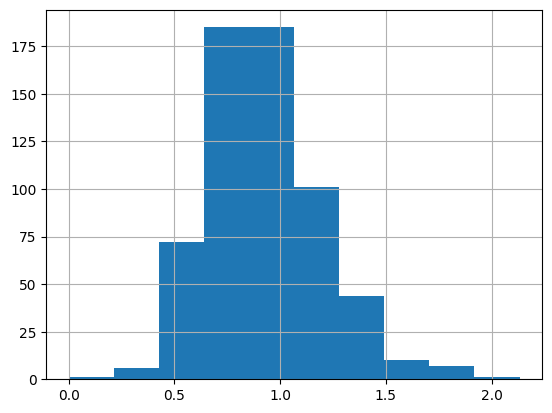

In [50]:
train.groupby('userId')['rating'].std().hist()
# 사용자 별 rating 표준편차는 전체 rating의 표준편차(1.04)보다는 작은 쪽에 많이 위치 되어 있다.
# => 이럴 때는 사용자의 평균평점을 사용하여 예측하는 것이 rmse를 낮출 수 있다.

## (숙제) 영화 평점 기반 예측하기
- 각 영화의 평균 평점으로(train), 영화에 대한 평점을 예측(test) 하세요.
- train에 해당 영화에 대한 평점기록이 전혀 없다면, 어떻게 해야할까요?
- (예: movieId 1번의 train 데이터상 평균 평점을 4. 5라고 한다면, movieId 1번의 test 데이터에 대한 모든 영화 평점을 4.5로 한다.)
- 이 예측 방법은 어떤 가정을 가지고 있나요? 예측의 근거를 찾아보세요.

In [59]:
# 주의: train이나 test 데이터에 아예 영화에 대한 평점기록이 없는 경우가 발생할 수 있음
# 가정: 사람들이 좋아하는 영화와 싫어하는 영화는 따로 있다 (좋아하는 영화- 다들 높게 줌, 싫어하는 영화- 다들 낮게 줌)
# -> 영화 안에서의 분산이 크지 않을 것이다.

In [60]:
# 각 영화의 평균 평점 구하기
movie_mean = train.groupby('movieId')['rating'].mean().reset_index()
movie_mean = movie_mean.rename(columns = {'rating' :'predict'})
movie_mean.sample()

,movieId,predict
7276,83803,4.1


In [61]:
# <내가 작성한 코드> test['movieMean'] = test['movieId'].apply(lambda x: movie_mean[x])

predict_by_movies = test.merge(movie_mean, how='left', on='movieId')
predict_by_movies.sample()

,userId,movieId,rating,timestamp,predict
533,111,48385,2.5,1516153506,3.364407


In [62]:
# train에 해당 영화에 대한 평점 기록이 없는 갯수 확인
predict_by_movies.isnull().sum()
# 343개의 null 값 존재

userId         0
movieId        0
rating         0
timestamp      0
predict      343
dtype: int64

In [63]:
# 영화에 대한 평점 기록 없는 경우만 보기
# NaN (Not a Number)
predict_by_movies[predict_by_movies['predict'].isnull()]

,userId,movieId,rating,timestamp,predict
9,503,94130,3.5,1335219376,NaN
12,200,62299,3.5,1229876803,NaN
155,288,2055,3.0,976120488,NaN
156,448,97858,2.0,1387894354,NaN
190,89,78142,4.5,1520409453,NaN
...,...,...,...,...,...
9941,387,7745,4.0,1117438276,NaN
9969,448,65135,3.0,1232207748,NaN
9972,606,202,3.0,1172015598,NaN
10009,64,27869,4.5,1161531223,NaN


In [64]:
# null 처리: 전체 데이터의 평균으로 채운다
# Pandas location: def.loc[index(filtering), column]
predict_by_movies.loc[predict_by_movies['predict'].isnull(), 'predict'] = train['rating'].mean()

In [65]:
# 다시 null 값 확인
predict_by_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
predict      0
dtype: int64

In [67]:
# 모델 성능 평가

# <내가 작성한 코드> mse = mean_squared_error(test['rating'], test['movieMean'])

mse = mean_squared_error(predict_by_movies['rating'], predict_by_movies['predict'])
rmse = np.sqrt(mse)
rmse

0.9780550716595185